# Bayesian Networks using Pomegranate
Bayesian networks are a powerful inference tool, in which a set of variables are represented as nodes, and the lack of an edge represents a conditional independence statement between the two variables, and an edge represents a dependence between the two variables. One of the powerful components of a Bayesian network is the ability to infer the values of certain variables, given observed values for another set of variables.

## Pomegranate
Pomegranate is a Python-based library for creating and infering probabilities from *discete* Bayesian networks. `pygraphviz` helps visualize the network. Feel free to look at the documentation of `pomegranate` at https://readthedocs.org/projects/pomegranate/.

In [1]:
from pomegranate import BayesianNetwork

import numpy
import seaborn
import time

In [2]:
%pylab inline

from pylab import rcParams
rcParams['figure.figsize'] = 5, 10

Populating the interactive namespace from numpy and matplotlib


In [3]:
seaborn.set_style('whitegrid')

## Creating a Dummy Dataset

The `make_dataset` method below creates a toy dataset with 2000 instances and 7 variables. Instead of keeping the data randomly distributed, we can make connections between the variables by making them linear combinations of other variables.

In the function below, we make the following connections.

```
2 -> 1
3 -> 0
5 -> (4, 3)
6 -> (1, 4, 0)
```

The goal of the Bayesian network is to automatically infer this network by identifying the root nodes (i.e. nodes that are completely independent of others), and the edges between the nodes (both direct and indirect).

In [4]:
def make_dataset():
    X = numpy.random.randint(2, size=(2000, 7))
    X[:,2] = 3*X[:,1]
    X[:,3] = 2*X[:,0]
    X[:,5] = X[:,4] + 2*X[:,3]
    X[:,6] = 3*X[:,1] + 4*X[:,4] + 8*X[:,0]
    return X

## Creating the Bayesian Network

`BayesianNetwork.from_samples()` is the method used to create a network from a given dataset. Optionally, one can pass in an additional argument to this method detailing which algorithm to use. The default is a greedy algorithm that chooses a topological ordering of the variables, but optimally identifies the best parents for each variable given this ordering.

However, it is also possible to select an *exact* algorithm that runs in super-exponential time (which can be reduced to exponential time using Dynamic Programming). Even with several optimizations, Bayesian Networks are not suitable when the number of variables exceed ~25. In this tutorial, we stick with the default algorithm.

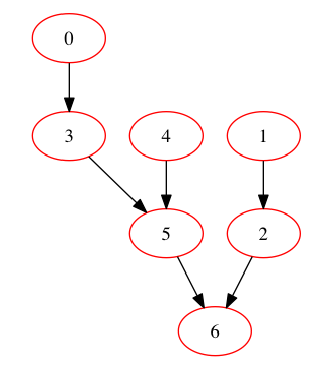

In [5]:
X = make_dataset()
model = BayesianNetwork.from_samples(X)
model.plot()